In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 8)

import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

In [396]:
# load dataset
dataset = pd.read_csv('dataset/spotify_tracks.csv')
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


<span style="color:blue">**NUMERICAL**</span> features of the dataset :

- <span style="color:orange">***popularity***</span>: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

- <span style="color:blue">***duration_ms***</span>: The track length in milliseconds

- <span style="color:blue">***danceability***</span>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

- <span style="color:blue">***energy***</span>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
    
- <span style="color:blue">***loudness***</span>: The overall loudness of a track in decibels (dB)
    
- <span style="color:blue">***speechiness***</span>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
    
- <span style="color:blue">***acousticness***</span>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
    
- <span style="color:blue">***instrumentalness***</span>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
    
- <span style="color:blue">***liveness***</span>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
    
- <span style="color:blue">***valence***</span>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
    
- <span style="color:blue">***tempo***</span>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

In [397]:
# drop columns corresponding to categorical features
dataset.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 
                      'explicit', 'key', 'mode', 'time_signature', 'track_genre'], inplace=True)

In [398]:
#dataset.isnull().sum()         # to check if there are missing values
#dataset.dropna(inplace=True)   # to drop records with missing values

In [399]:
#dataset.nunique(axis=0)    # to check the number of distinct values for each column

In [400]:
X = dataset.drop(columns=['popularity'])    # features
y = dataset['popularity']                   # target variable

In [401]:
print(X.shape) 
X.describe()

(114000, 10)


,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837
std,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197
min,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750
50%,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000
max,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


(114000,)
popularity
99         1
100        2
95         5
98         7
94         7
       ...  
1       2140
44      2288
21      2344
22      2354
0      16020
Name: count, Length: 101, dtype: int64


<Axes: >

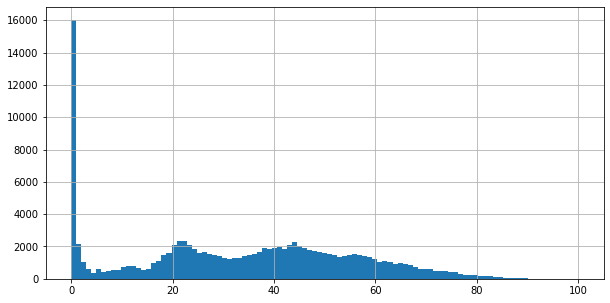

In [402]:
print(y.shape)
print(y.value_counts().sort_values())
y.hist(bins=101, figsize=(10,5))

In [403]:
X['popularity_subsamples'] = y.map(lambda x: x if x % 2 == 0 else x+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['popularity_subsamples'])

X_train.drop(columns='popularity_subsamples', inplace=True)
X_test.drop(columns='popularity_subsamples', inplace=True)

### Features selection

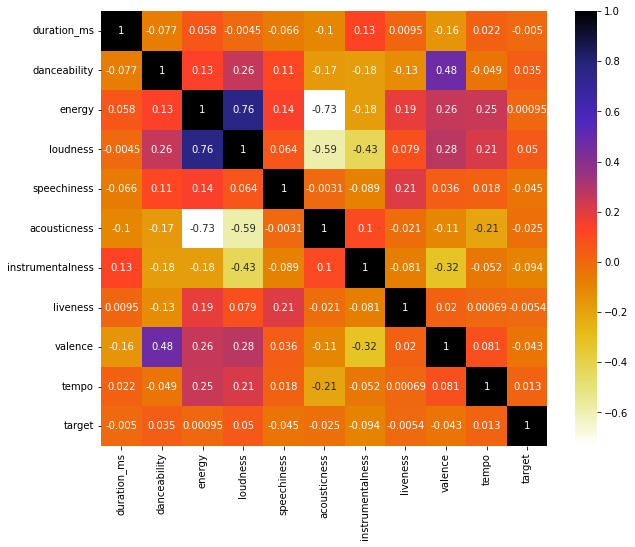

In [404]:
all_data = X_train.copy()
all_data['target'] = y_train
plt.figure(figsize=(10,8))
sns.heatmap(all_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

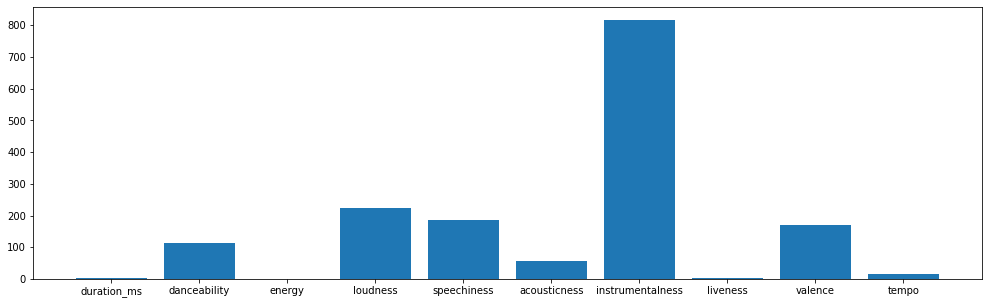

In [405]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)

plt.figure(figsize=(17,5))
plt.bar([X_train.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [406]:
worst_features = ['duration_ms', 'energy', 'liveness', 'tempo']
X_train.drop(columns=worst_features, inplace=True)
X_test.drop(columns=worst_features, inplace=True)

### Features normalization

In [407]:
standard_scaler = preprocessing.StandardScaler().set_output(transform="pandas")

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

### *Ridge Regression* on *Spotify Tracks Dataset* 
(using only numerical features)

In [408]:
# importing my implementation of Ridge regression
from rr import RidgeRegression 

In [409]:
λ_grid = np.linspace(0, 250, num=100)

learner = GridSearchCV(estimator=RidgeRegression(), param_grid={'λ': λ_grid}, scoring='neg_mean_squared_error', cv=5)
learner.fit(X_train, y_train)

print('best λ :', learner.best_params_['λ'])

best λ : 73.23232323232322


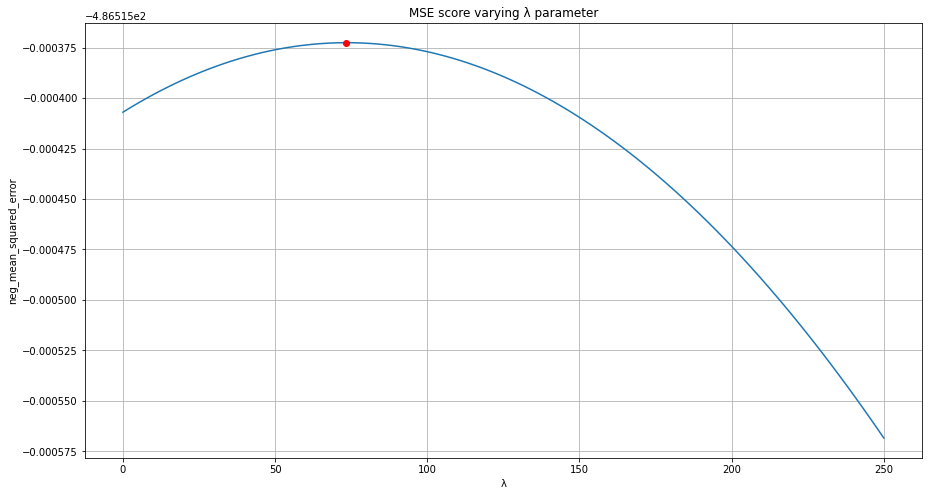

In [410]:
fig, ax = plt.subplots()
ax.plot(learner.cv_results_['param_λ'].data, 
        learner.cv_results_['mean_test_score'])
ax.plot(learner.best_params_['λ'], learner.best_score_, 'ro') 
ax.set(xlabel='λ', ylabel='neg_mean_squared_error', title='MSE score varying λ parameter')
ax.grid()
plt.show()

In [411]:
rr = learner.best_estimator_
rr.fit(X_train, y_train)
y_prediction = rr.predict(X_test)

print('   MSE :', mean_squared_error(y_test, y_prediction))
print('   MAE :', mean_absolute_error(y_test, y_prediction))
print('    R2 :', r2_score(y_test, y_prediction))

   MSE : 487.34675482923825
   MAE : 18.44594005253612
    R2 : 0.020614849924539658


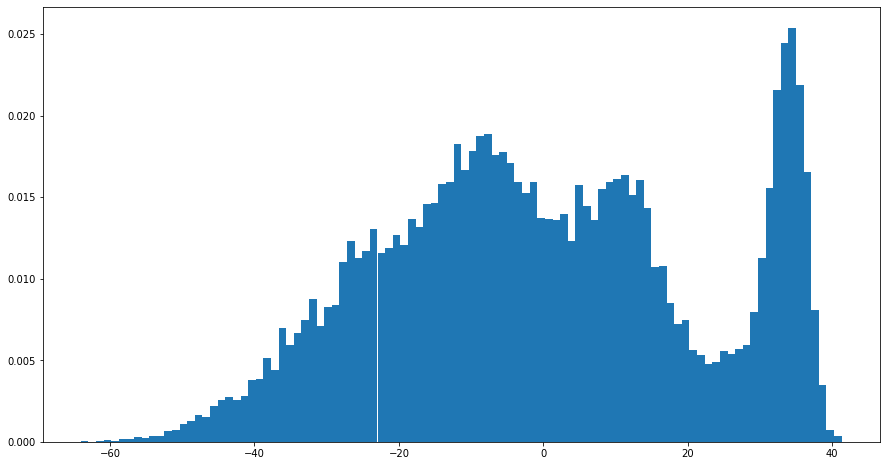

In [412]:
fig, ax = plt.subplots()
ax.hist(y_prediction - y_test, density=True, bins=100)
plt.show()

Checking that my implementation performs exactly as the one in *sklearn*

In [413]:
debug = False

if debug:

    learner = GridSearchCV(estimator=Ridge(), param_grid={'alpha': λ_grid}, scoring='neg_mean_squared_error', cv=5)
    learner.fit(X_train, y_train)

    print('best λ :', learner.best_params_['alpha'])

    learner.best_estimator_.fit(X_train, y_train)
    y_prediction = learner.best_estimator_.predict(X_test)

    print('   MSE :', mean_squared_error(y_test, y_prediction))
    print('   MAE :', mean_absolute_error(y_test, y_prediction))
    print('    R2 :', r2_score(y_test, y_prediction))

### *Kernel Ridge Regression* on *Spotify Tracks Dataset* 
(using only numerical features)

In [444]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import rbf_kernel

class KernelRidgeRegression(BaseEstimator, RegressorMixin):

    def __init__(self, λ = 1.0, γ = 1.0):

        if λ < 0: raise ValueError("λ must be >= 0")
        if γ <= 0: raise ValueError("γ must be > 0")
        self.λ = λ
        self.γ = γ

        self.constant_ = None 
        self.X_ = None

    def gaussian_kernel(self, x_i, x_j):
        return np.exp(np.linalg.norm(x_i - x_j) / (-2 * self.γ))

    
    def fit(self, X, y):

        self.X_ = X.values #np.array(X.copy())

        m = self.X_.shape[0]

        ##K = rbf_kernel(self.X_, self.X_, gamma=1/(self.γ * 2))
        ##print(K)

        K = np.zeros((m, m))
        for i in range(m):
            for j in range(i,m): 
                K[i][j] = self.gaussian_kernel(self.X_[i, :], self.X_[j, :])
                K[j][i] = K[i][j]
    
        ##print(K)
        
        self.constant_ = y.T @ np.linalg.inv(K + self.λ * np.identity(m))

    def predict(self, X):

        if self.constant_ is None or self.X_ is None:
            raise RuntimeError('Model is still to fit')
        
        X_values = X.values
        
        n = X_values.shape[0]
        y_prediction = np.zeros(n)

        for j in range(n):
            k = np.array([self.gaussian_kernel(self.X_[i, :], X_values[j, :])
                         for i in range(self.X_.shape[0])])
            y_prediction[j] = self.constant_ @ k

        return y_prediction

In [415]:
# importing my implementation of Kernel Ridge regression
#from rrk import KernelRidgeRegression 

In [445]:
train_sample_size = 2000
test_sample_size = 400

X_train_sample = X_train.sample(n=train_sample_size, random_state=1)
y_train_sample = pd.Series(data = [y_train[i] for i in X_train_sample.index], index = X_train_sample.index)

X_test_sample = X_test.sample(n=test_sample_size, random_state=1)
y_test_sample = pd.Series(data = [y_test[i] for i in X_test_sample.index], index = X_test_sample.index)

In [446]:
rrk = KernelRidgeRegression()
rrk.fit(X_train_sample, y_train_sample)
y_prediction = rrk.predict(X_test_sample)

print('   MSE :', mean_squared_error(y_test_sample, y_prediction))
print('   MAE :', mean_absolute_error(y_test_sample, y_prediction))
print('    R2 :', r2_score(y_test_sample, y_prediction))

[[1.00000000e+00 1.97314876e-02 3.24507865e-01 ... 3.05781035e-01
  8.10511359e-03 6.13770204e-01]
 [1.97314876e-02 1.00000000e+00 1.83337449e-03 ... 6.85412447e-04
  5.30637424e-01 2.20391438e-02]
 [3.24507865e-01 1.83337449e-03 1.00000000e+00 ... 8.53623887e-01
  4.73145440e-04 4.35472602e-01]
 ...
 [3.05781035e-01 6.85412447e-04 8.53623887e-01 ... 1.00000000e+00
  1.52443635e-04 2.60819068e-01]
 [8.10511359e-03 5.30637424e-01 4.73145440e-04 ... 1.52443635e-04
  1.00000000e+00 8.53179785e-03]
 [6.13770204e-01 2.20391438e-02 4.35472602e-01 ... 2.60819068e-01
  8.53179785e-03 1.00000000e+00]]
[[1.         0.24635324 0.47229642 ... 0.46315052 0.21189721 0.61016143]
 [0.24635324 1.         0.16947517 ... 0.1482882  0.56956419 0.25129921]
 [0.47229642 0.16947517 1.         ... 0.75479836 0.14134645 0.52481036]
 ...
 [0.46315052 0.1482882  0.75479836 ... 1.         0.12291375 0.44054873]
 [0.21189721 0.56956419 0.14134645 ... 0.12291375 1.         0.21366078]
 [0.61016143 0.25129921 0.5248

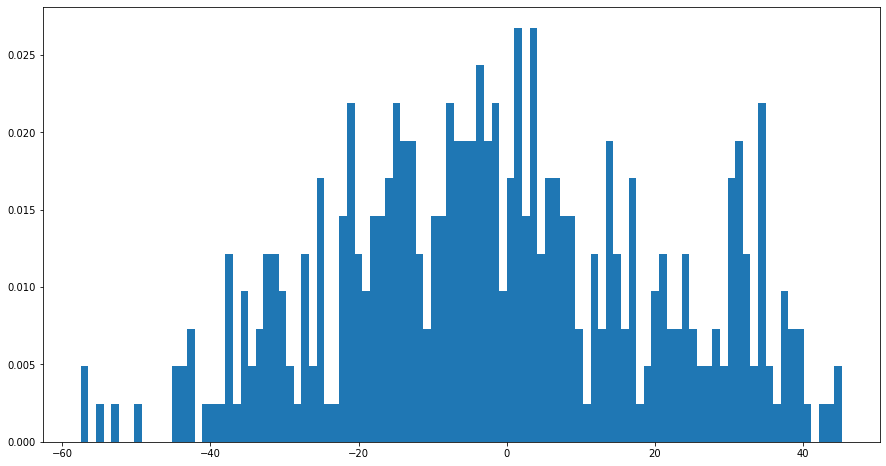

In [424]:
fig, ax = plt.subplots()
ax.hist(y_prediction - y_test_sample, density=True, bins=100)
plt.show()

In [425]:
λ_grid = np.linspace(0, 1000, num=10) # 

learner = GridSearchCV(estimator=KernelRidgeRegression(), param_grid={'λ': λ_grid}, scoring='neg_mean_squared_error', cv=5, verbose=2)
learner.fit(X_train_sample, y_train_sample)

print('best λ :', learner.best_params_['λ'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..............................................λ=0.0; total time=   3.8s
[CV] END ..............................................λ=0.0; total time=   3.8s
[CV] END ..............................................λ=0.0; total time=   3.8s
[CV] END ..............................................λ=0.0; total time=   3.9s
[CV] END ..............................................λ=0.0; total time=   3.9s
[CV] END ................................λ=333.3333333333333; total time=   5.7s
[CV] END ................................λ=333.3333333333333; total time=   5.4s
[CV] END ................................λ=333.3333333333333; total time=   5.4s
[CV] END ................................λ=333.3333333333333; total time=   5.3s
[CV] END ................................λ=333.3333333333333; total time=   5.5s
[CV] END ................................λ=666.6666666666666; total time=   5.7s
[CV] END ................................λ=666.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/pg/zj5j0p614fq_84l8hsgr_40h0000gn/T/ipykernel_1316/4183454896.py", line 31, in fit
    self.constant_ = y.T @ np.linalg.inv(K + self.λ * np.identity(m))
  File "<__array_function__ internals>", line 180, in inv
  File

best λ : 333.3333333333333


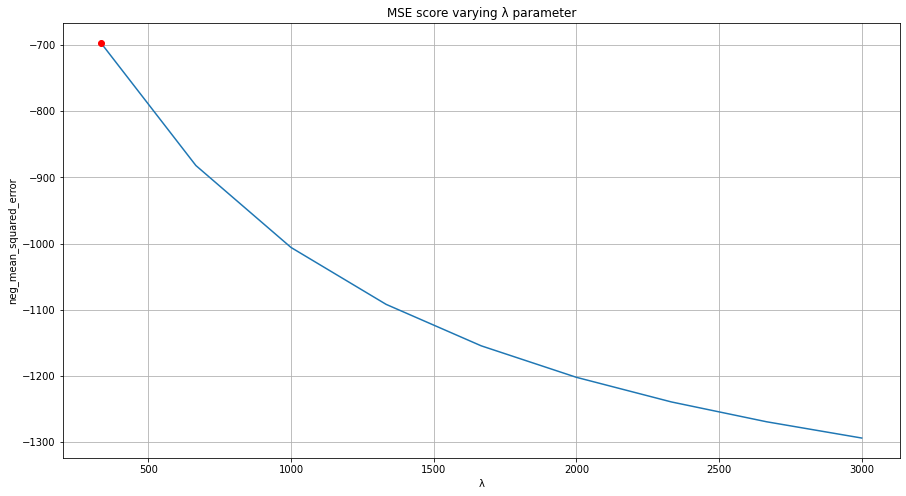

In [427]:
fig, ax = plt.subplots()
ax.plot(learner.cv_results_['param_λ'].data, 
        learner.cv_results_['mean_test_score'])
ax.plot(learner.best_params_['λ'], learner.best_score_, 'ro') 
ax.set(xlabel='λ', ylabel='neg_mean_squared_error', title='MSE score varying λ parameter')
ax.grid()
plt.show()

In [ ]:
rr = learner.best_estimator_
rr.fit(X_train, y_train)
y_prediction = rr.predict(X_test)

print('   MSE :', mean_squared_error(y_test, y_prediction))
print('   MAE :', mean_absolute_error(y_test, y_prediction))
print('    R2 :', r2_score(y_test, y_prediction))

In [ ]:
fig, ax = plt.subplots()
ax.hist(y_prediction - y_test, density=True, bins=100)
plt.show()